# Bank Marketing Dataset
- The [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) contains a reasonable large number of data related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The goal is to predict if the client will subscribe a term deposit.
- It is a fairly large dataset with 41K+ rows, a mixture of categorical and continuous columns as well as data imperfections to identify and manage.

## Dataset
The data has the following columns



Bank client data:

|col num | col name | description |
|:---|:---|:---|
| 1 | age | (numeric) | 
| 2 | job | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |
| 3 | marital | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) |
| 4 | education | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') |
| 5 | default | has credit in default? (categorical: 'no','yes','unknown') |
| 6 | housing | has housing loan? (categorical: 'no','yes','unknown') |
| 7 | loan | has personal loan? (categorical: 'no','yes','unknown') |

Related with the last contact of the current campaign:

|col num | col name | description |
|:---|:---|:---|
| 8 | contact | contact communication type (categorical: 'cellular','telephone') |
| 9 | month | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') |
| 10 | day_of_week | last contact day of the week (categorical: 'mon','tue','wed','thu','fri') |


Other attributes:

|col num | col name | description |
|:---|:---|:---|
| 11 | campaign | number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| 12 | pdays | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) |
| 13 | previous | number of contacts performed before this campaign and for this client (numeric) |
| 14 | poutcome | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') |

Social and economic context attributes:

|col num | col name | description |
|:---|:---|:---|
| 15 | emp.var.rate | employment variation rate - quarterly indicator (numeric) |
| 16 | cons.price.idx | consumer price index - monthly indicator (numeric) |
| 17 | cons.conf.idx | consumer confidence index - monthly indicator (numeric) |
| 18 | euribor3m | euribor 3 month rate - daily indicator (numeric) |
| 19 | nr.employed | number of employees - quarterly indicator (numeric) |

Output variable (desired target):

|col num | col name | description |
|:---|:---|:---|
| 20 | y | This is the target column. Has the client subscribed a term deposit? (binary: 'yes','no') |

## Goal
The goal of this project is 
1. Build and Tune the hyperparameters of a Sklearn model to predict the target column `y` using AWS Sagemaker 
1. Deploy the model as a `Serverless Inference Endpoint` and test it
1. Run `Batch Transform` on the entire input dataset
1. Calculate the performance of the model predictions on the entire input dataset

## Recommended Steps
1. **Data Exploration:** Understand the data by looking at distributions and unique values in the columns. Are there any issues with the data?
1. **Data Cleaning:** Handle any issues you found with the data.
1. **Feature Engineering:** Handle the various datatypes by applying the appropriate feature engineering techniques
1. **Model Selection:** Choose an appropriate sklearn model for this problem and implement the sagemaker model training code
1. **Hyperparameter tuning:** Choose appropriate hyperparameter ranges and objective metric for the chosen model and implement the sagemaker hyperparameter tuning code
1. **Model training:** Submit the hyperparameter tuning job to sagemaker and monitor the execution progress
1. **Model deployment as severless inference:** Pick the best model from hyperparameter tuning, deploy it as a sagemaker serverless inference endpoint and test if it works by posting some sample data to it
1. **Batch transform:** Store the input dataset to a json lines file, deploy the model as a batch transform and run the batch transform job on the input json lines file.
1. **Performance calculation:** Calculate model performance on the entire input dataset using output of the batch transform job.

## Tips
- You can use the below code to get the S3 bucket to write any artifacts to
    ```
    import sagemaker
    session = sagemaker.Session()
    bucket = session.default_bucket()
    ```
- Are all the columns necessary or can we drop any?
- Does the data contain any issues?
- What ML task is this? Classification? Regression? Clustering?
- What are the data types of the columns? What pre-processing should you apply?
- What is the most appropriate metric for this model?

In [1]:
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import warnings
from IPython.display import display
pd.set_option('display.max_columns', None)

df = pd.read_csv("https://raw.githubusercontent.com/stephenleo/sagemaker-deployment/main/data/final_project_bank.csv")

print(df.shape)
df.head()

(41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,NaN,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,NaN,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## All the best!
Get started below...

In [2]:
df.shape

(41188, 20)

In [3]:
null_value_percentage = df.isnull().sum()
print(null_value_percentage)

age               421
job               484
marital           413
education         424
default           391
housing           379
loan              455
contact           440
month             421
day_of_week       436
campaign          413
pdays             449
previous          418
poutcome          431
emp.var.rate      418
cons.price.idx    369
cons.conf.idx     404
euribor3m         429
nr.employed       437
y                 398
dtype: int64


In [40]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,40767.000000,40775.00000,40739.000000,40770.000000,40770.000000,40819.000000,40784.000000,40759.000000,40751.000000
mean,40.021120,2.56699,962.340730,0.172823,0.082460,93.575781,-40.504127,3.620653,5167.062656
std,10.419903,2.76876,187.242913,0.494873,1.570749,0.578958,4.624825,1.734620,72.224169
min,17.000000,1.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.00000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.00000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.00000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
count_of_duplicate_rows = df.duplicated().sum()
print(count_of_duplicate_rows)

1221


In [5]:
df = df.drop_duplicates()

In [6]:
count_of_duplicate_rows_2 = df.duplicated().sum()
print(count_of_duplicate_rows_2)

0


In [7]:
# Fill NaN values for numeric columns with mean
numeric_cols = ['age', 'pdays', 'previous', 'euribor3m', 'nr.employed', 'cons.conf.idx']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill NaN values for 'cons.price.idx' and 'emp.var.rate' with -1
df['cons.price.idx'] = df['cons.price.idx'].fillna(-1)
df['emp.var.rate'] = df['emp.var.rate'].fillna(-1)

# Fill NaN values for 'campaign' with median
median_value = df['campaign'].median()
df['campaign'] = df['campaign'].fillna(median_value)

# Fill NaN values for object columns with mode
object_cols = ['y','job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df[object_cols] = df[object_cols].apply(lambda x: x.fillna(x.mode()[0]))


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39967 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39967 non-null  float64
 1   job             39967 non-null  object 
 2   marital         39967 non-null  object 
 3   education       39967 non-null  object 
 4   default         39967 non-null  object 
 5   housing         39967 non-null  object 
 6   loan            39967 non-null  object 
 7   contact         39967 non-null  object 
 8   month           39967 non-null  object 
 9   day_of_week     39967 non-null  object 
 10  campaign        39967 non-null  float64
 11  pdays           39967 non-null  float64
 12  previous        39967 non-null  float64
 13  poutcome        39967 non-null  object 
 14  emp.var.rate    39967 non-null  float64
 15  cons.price.idx  39967 non-null  float64
 16  cons.conf.idx   39967 non-null  float64
 17  euribor3m       39967 non-null  floa

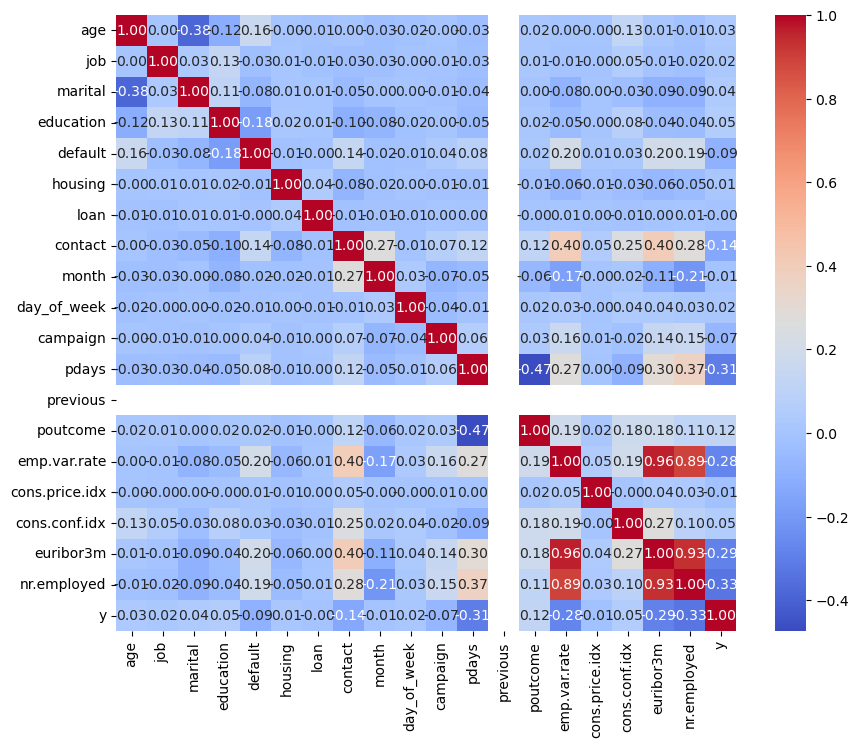

In [81]:
plt.figure(figsize=(10, 8))
corr = df.corr()
#corr = df.corr(numeric_only=True)
correlation_heatmap=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
             cmap='coolwarm', fmt=".2f")
plt.show()

In [12]:
columns = ['campaign','previous']
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    threshold = Q3 +  3 * IQR 
    df[col] = df[col].apply(lambda x: threshold if x > threshold else x)


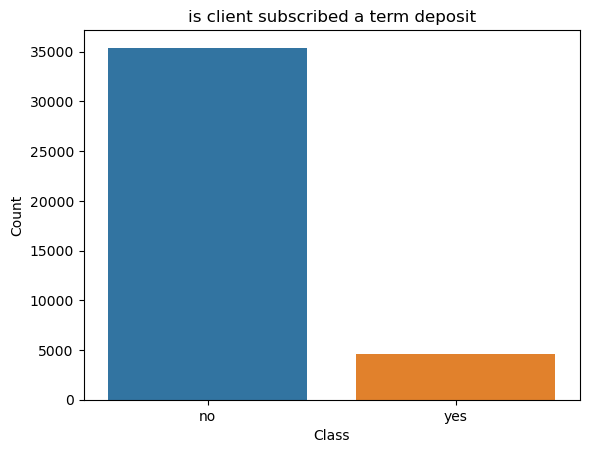

In [9]:
value_counts = df['y'].value_counts()

cancellation_barplot = sns.barplot(x=value_counts.index, y=value_counts.values)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('is client subscribed a term deposit')
plt.show()


In [10]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

In [13]:
col=df.select_dtypes('object').columns

for i in col:
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes

In [14]:
X = df.drop(['y'], axis=1)   
Y = df['y']

count_0 = Y.value_counts()[0]
count_1 = Y.value_counts()[1]
average_count = int((count_0 + count_1) / 2)


resampling_pipeline = Pipeline([
    ('oversampler', SMOTE(sampling_strategy={1: average_count})),
    ('undersampler', RandomUnderSampler(sampling_strategy={0: average_count}))
])


x_resampled, y_resampled = resampling_pipeline.fit_resample(X, Y)

X,Y =x_resampled, y_resampled
df_resampled = pd.concat([X,Y],axis=1)
df_resampled.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20451,32.0,9,1,3,1,2,0,0,1,1,4.0,999.0,0.0,1,1.4,93.444,-36.1,4.963,5228.1,0
37676,63.0,5,1,0,0,2,0,0,7,3,3.0,999.0,0.0,1,-3.4,92.649,-30.1,0.715,5017.5,0
2217,55.0,10,1,0,1,2,0,1,6,3,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.856,5191.0,0
26453,31.0,0,2,6,0,2,2,0,7,0,1.0,999.0,0.0,1,-0.1,93.200,-42.0,4.021,5195.8,0
23440,38.0,4,1,6,0,2,0,1,7,2,1.0,999.0,0.0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [36]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

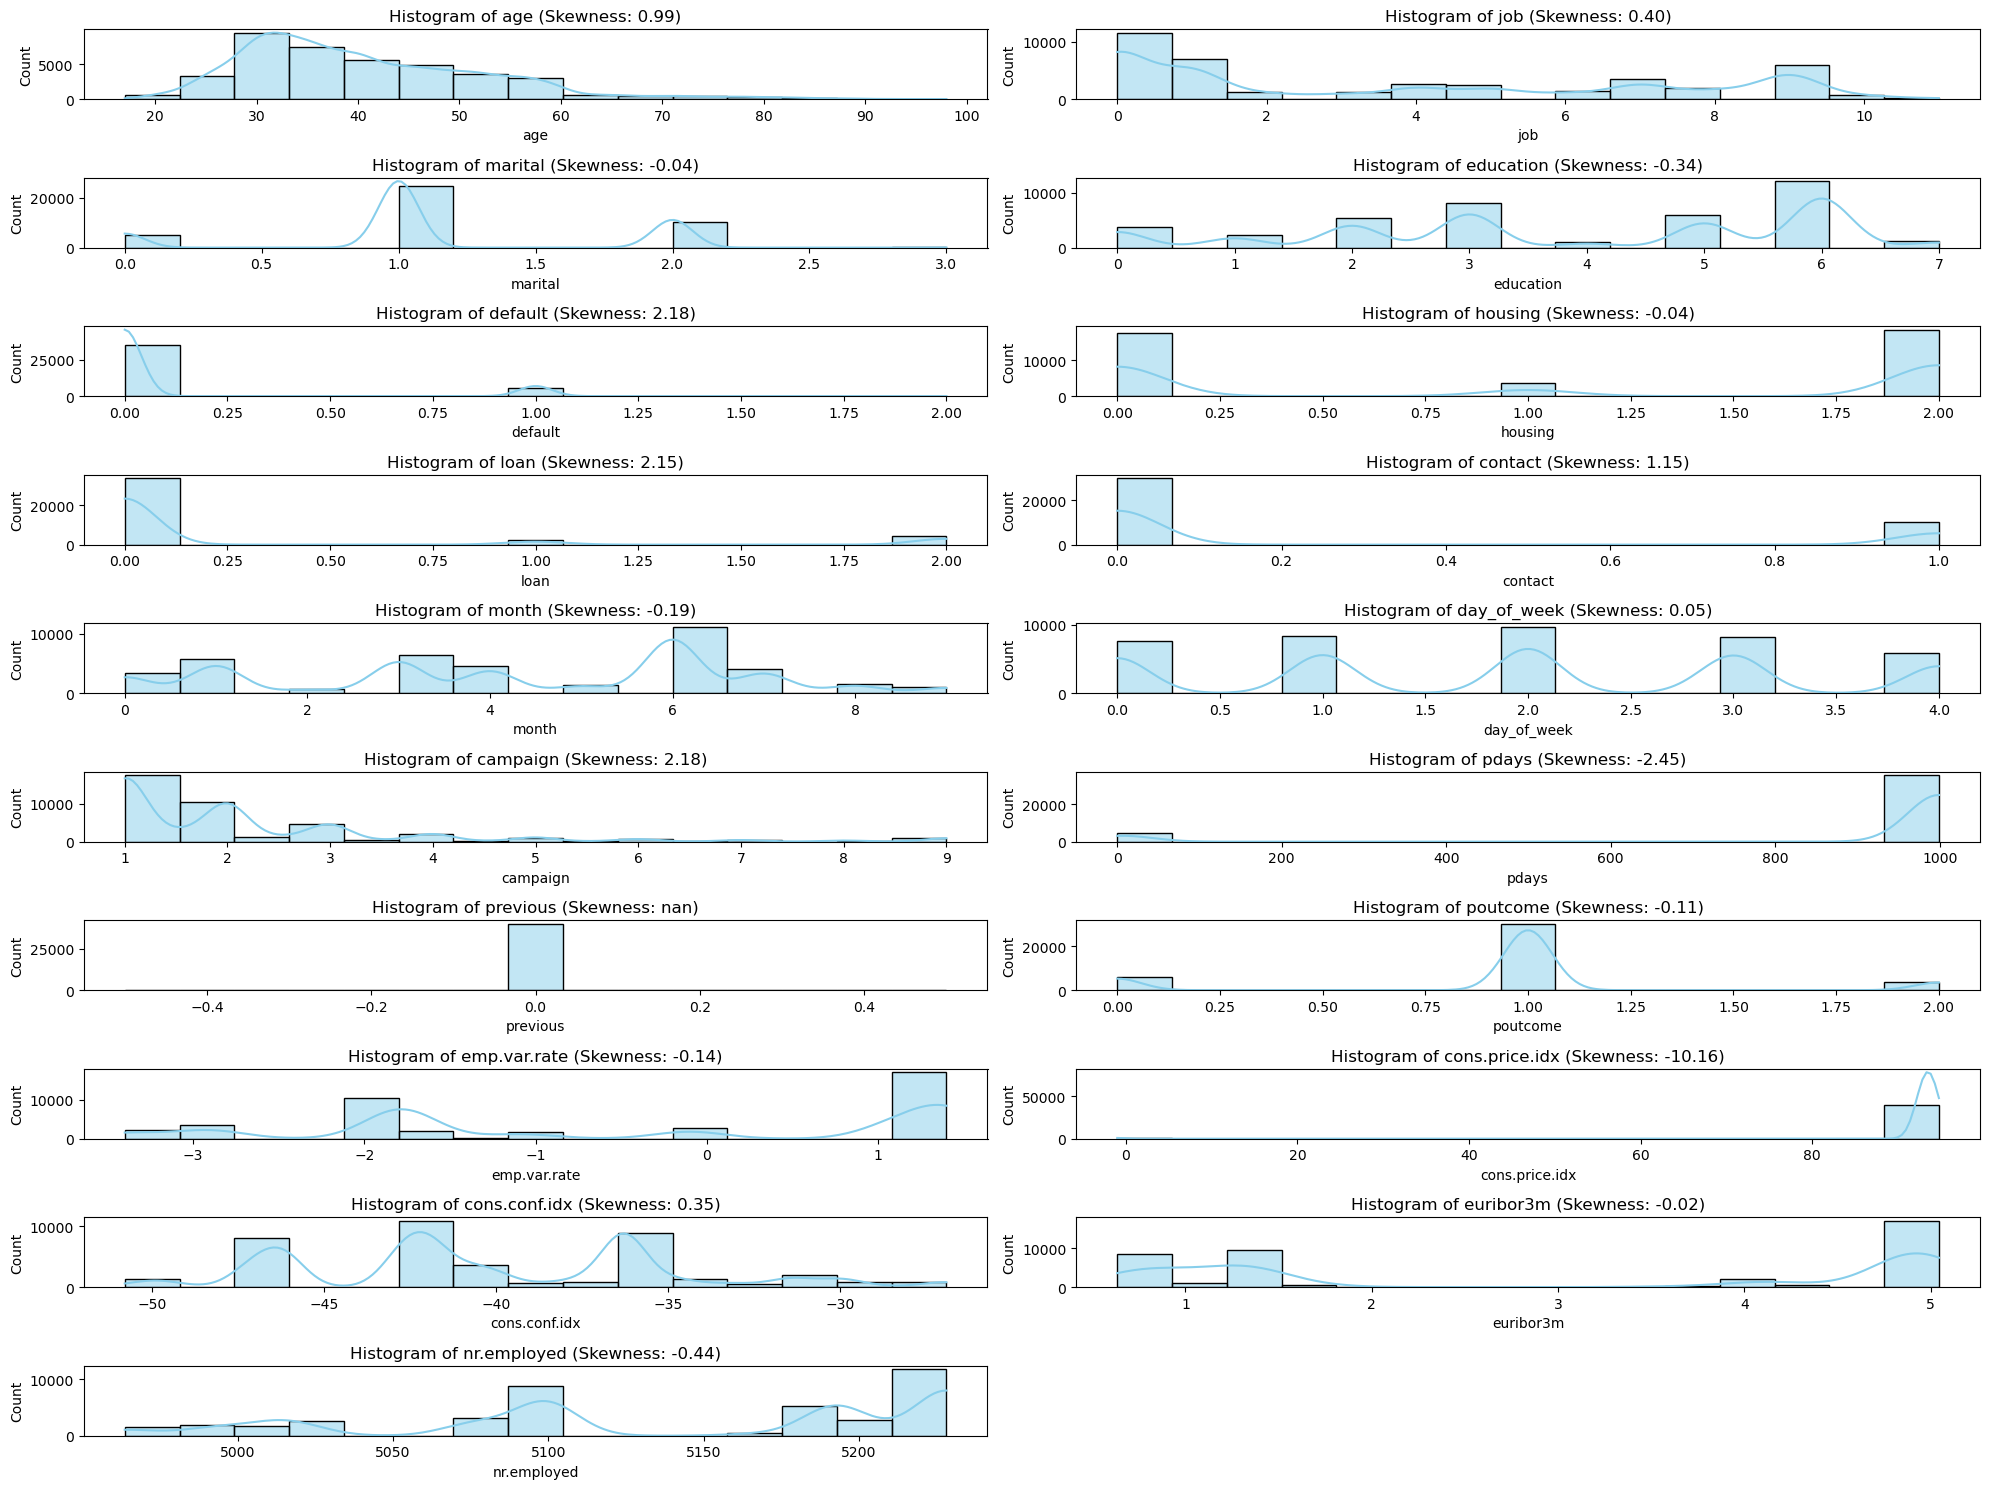

In [15]:
numerical_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
                     'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']

num_columns = len(numerical_columns)
num_rows = (num_columns + 1) // 2  # This will create enough rows for all subplots

fig = plt.figure(figsize=(20, 15))  # Adjust figure size as needed

for i, column in enumerate(numerical_columns, 1):
    column_data = df_resampled[column]
    skewness = stats.skew(column_data)
    
    plt.subplot(num_rows, 2, i)
    sns.histplot(df_resampled, x=column, kde=True, color='skyblue', bins=15)
    plt.title(f'Histogram of {column} (Skewness: {skewness:.2f})')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


C:\Users\Menka\AppData\Local\Temp\ipykernel_10464\1054585000.py:38: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = stats.skew(column_data)


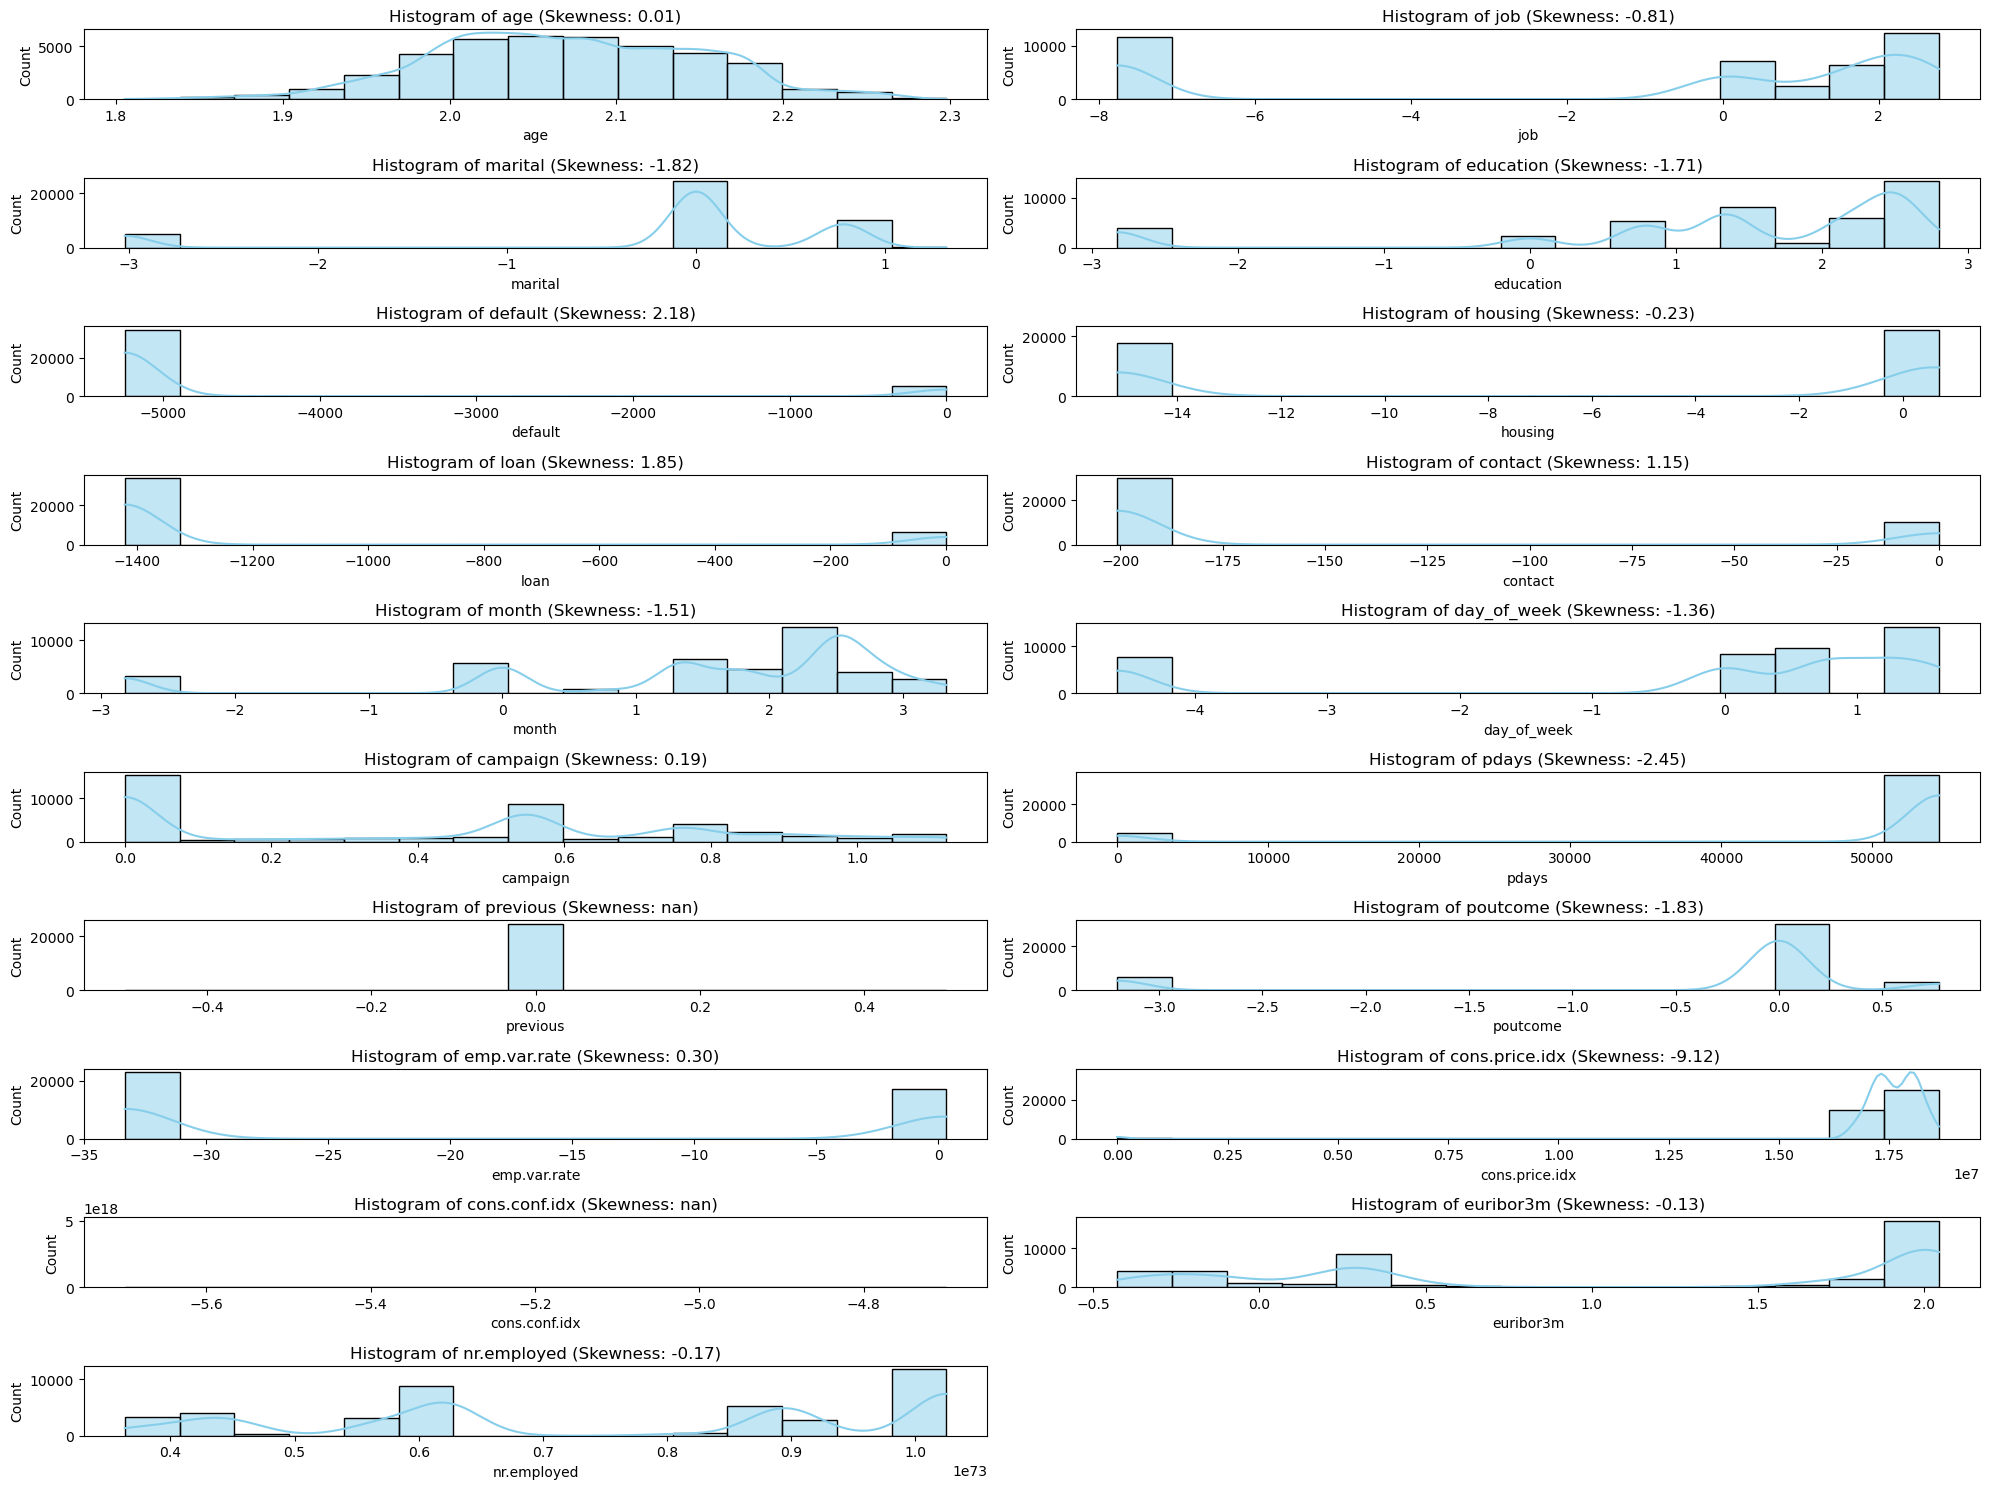

In [16]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
# Assuming df_resampled is already defined
transformed_df = pd.DataFrame()

# Initialize the PowerTransformer and QuantileTransformer
pt = PowerTransformer(method='box-cox', standardize=False)
qt = QuantileTransformer(output_distribution='normal', random_state=0)

# Transforming the data
for column in numerical_columns:
    column_data = df_resampled[column].copy()
    
    if column_data.nunique() == 1:
        # If the column has constant values, skip transformation
        transformed_df[column] = column_data
        continue
    
    # Replace zero and negative values with a small positive value to avoid issues with Box-Cox transformation
    column_data[column_data <= 0] = 1e-9
    
    try:
        # Attempt to transform using PowerTransformer (Box-Cox)
        transformed_data = pt.fit_transform(column_data.values.reshape(-1, 1))
        transformed_df[column] = transformed_data.flatten()
    except ValueError:
        # If Box-Cox fails, use QuantileTransformer as a fallback
        transformed_data = qt.fit_transform(column_data.values.reshape(-1, 1))
        transformed_df[column] = transformed_data.flatten()

# Set up the plotting
num_columns = len(numerical_columns)
num_rows = (num_columns + 1) // 2  # This will create enough rows for all subplots

fig2 = plt.figure(figsize=(20, 15))  # Adjust figure size as needed

for i, column in enumerate(numerical_columns, 1):
    column_data = transformed_df[column]
    skewness = stats.skew(column_data)
    
    plt.subplot(num_rows, 2, i)
    sns.histplot(column_data, kde=True, color='skyblue', bins=15)
    plt.title(f'Histogram of {column} (Skewness: {skewness:.2f})')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [17]:
scaler = MinMaxScaler()
numerical_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']
for col in numerical_columns:
    numerical_data = transformed_df[col].values.reshape(-1, 1)
    X_scaled = scaler.fit_transform(numerical_data)
    transformed_df[col] = X_scaled
transformed_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.432494,0.975056,0.695309,0.740912,0.999883,1.0,0.0,0.0,0.459342,0.739330,0.790935,1.0,NaN,0.805366,1.000000,0.945562,0.0,0.989623,1.000000
1,0.801807,0.905287,0.695309,0.000000,0.000000,1.0,0.0,0.0,0.914874,0.939318,0.683269,1.0,0.0,0.805366,0.000000,0.913937,0.0,0.043557,0.132203
2,0.734543,0.988079,0.695309,0.000000,0.999883,1.0,0.0,1.0,0.866284,0.939318,0.000000,1.0,NaN,0.805366,0.992906,0.967916,0.0,0.975894,0.794541
3,0.412969,0.000000,0.874497,0.946907,0.000000,1.0,1.0,0.0,0.914874,0.000000,0.000000,1.0,NaN,0.805366,0.000000,0.935770,0.0,0.860464,0.819584
4,0.534536,0.880036,0.695309,0.946907,0.000000,1.0,0.0,1.0,0.914874,0.859940,0.000000,1.0,NaN,0.805366,0.000000,0.935770,0.0,0.885279,0.819584


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:",Y_train.shape)
print("y_test shape:", Y_test.shape)

X_train shape: (31972, 19)
X_test shape: (7994, 19)
y_train shape: (31972,)
y_test shape: (7994,)


In [19]:
Bernoulli_classifier = BernoulliNB()
Bernoulli_classifier.fit(X_train, Y_train)
y_pred = Bernoulli_classifier.predict(X_test)


In [20]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(Y_test, y_pred))

y_prob = Bernoulli_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(Y_test,y_prob)
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      4016
           1       0.70      0.73      0.72      3978

    accuracy                           0.71      7994
   macro avg       0.71      0.71      0.71      7994
weighted avg       0.71      0.71      0.71      7994

ROC AUC: 0.75


In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

bnb = BernoulliNB()

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_
print("Best Hyperparameters: ", best_hyperparameters)

# Get the best estimator
best_bnb_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_bnb_model.predict(X_test)

# Evaluate the best model
print(classification_report(Y_test, y_pred))

# Predict probabilities for ROC AUC score
y_prob = best_bnb_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_test, y_prob)
print(f"ROC AUC: {roc_auc:.2f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'alpha': 0.01, 'fit_prior': True}
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      4016
           1       0.70      0.73      0.72      3978

    accuracy                           0.71      7994
   macro avg       0.71      0.71      0.71      7994
weighted avg       0.71      0.71      0.71      7994

ROC AUC: 0.75


In [24]:
# Assuming best_bnb_model is your trained BernoulliNB model
feature_names = X_train.columns
class_labels = best_bnb_model.classes_

# Get the feature log probabilities
feature_log_probabilities = best_bnb_model.feature_log_prob_

# Example: Displaying feature log probabilities
for i, class_label in enumerate(class_labels):
    print(f"Class: {class_label}")
    for j, feature_name in enumerate(feature_names):
        print(f"Feature: {feature_name}, Log Probability: {feature_log_probabilities[i][j]}")


Class: 0
Feature: age, Log Probability: -6.262911380616742e-07
Feature: job, Log Probability: -0.29331406201547416
Feature: marital, Log Probability: -0.11678984017217076
Feature: education, Log Probability: -0.10963593615502276
Feature: default, Log Probability: -1.501323945132805
Feature: housing, Log Probability: -0.5949773496571265
Feature: loan, Log Probability: -1.7232028418939
Feature: contact, Log Probability: -0.9245918180438508
Feature: month, Log Probability: -0.059213136639893804
Feature: day_of_week, Log Probability: -0.21314223175685143
Feature: campaign, Log Probability: -6.262911380616742e-07
Feature: pdays, Log Probability: -0.0002511742094259972
Feature: previous, Log Probability: -14.283450809910462
Feature: poutcome, Log Probability: -0.10698378681439635
Feature: emp.var.rate, Log Probability: -0.48702012049540855
Feature: cons.price.idx, Log Probability: -0.009123336309880159
Feature: cons.conf.idx, Log Probability: -14.283450809910462
Feature: euribor3m, Log Proba